# 데이터 해설

퓨어 퍼슛

<img src="./images/%ED%93%A8%EC%96%B4%20%ED%8D%BC%EC%8A%9B4.png" width="40%" height="30%" title="퓨어 퍼슛 개념" alt="pure-pursuit"></img>

경로 추종 방식의 하나인 퓨어-퍼슛은, 선으로 이어진 경로에서, 항상 경로위의 한점으로 이동하려고 하면 경로를 벗어나지 않는 계속 따라갈 수 있는 원리를 이용한다.
경로에서 조금 이탈하더라도, 경로위의 한점 방향을 계속 바라보고 달란다면, 다시 경로 위의 어느 한점으로 돌아오기 때문에 경로를 이탈하지 않는 것이다.
이때 경로위의 한점을 바라보는 거리를 LAD 라고 한다.

퓨어 퍼슛에서 LAD라는 변수의 크기에 따라 경로의 진동을 완화 시켜주는 작용을 한다.
(파랑 : 목표 경로, 주황 : 실제 주행 경로)

<img src="./images/concept_of_short_log_03.png" width="40%" height="30%" title="퓨어 퍼슛 테스트 이미지" alt="pure-pursuit test"></img>

그러나 경로의 특성마다 적합한 LAD의 값과 그때의 진동 감쇠효과가 다 달라서, 
시뮬레이션에 사용된 LAD 값이 경로의 진동을 완화 시켜주는 효과를 발휘하는지 명확히 알지 못한다. 

하지만 경로에서 진동을 잘 흡수하는 LAD의 범위를 미리 계산한다면, 
시뮬레이션에서 필요한 LAD의 값의 범위를 합리적으로 계산된 범위에서 선택할 수 있다.

이를 위해 다양한 예시 경로를 만들고 각 예시 경로에 대한 진동을 잘 흡수하는 LAD 범위를 구해본다. 
>LAD 범위
>    * 최소 LAD : 진동감쇠가 전혀 이루어 지지 않는 지점 진동 전달률이 90%
>    * 최대 LAD : 진동감쇠가 확실히 이루어 지는 지점 진동 전달률이 10%

위처럼 계산된 이후부터는 예시 경로 리스트 중에서 테스트를 하면 
시물레이션에서 사용해야할 LAD 값을 사전에 계산된 값을 참고하여 사용할 수 있다.

---------------------------------------
# 데이터 수집 과정

데이터는 2022년 04월 27일에 MATLAB 코드로 작성한 시뮬레이터에서 데이터 수집 부분을 추가하여 데이터를 excel 형식으로 추출하였다.


<img src="./images/data_log_code.png" width="30%" height="20%" title="퓨어 퍼슛 테스트 이미지" alt="pure-pursuit test"></img>



참고자료
https://www.dbpia.co.kr/journal/articleDetail?nodeId=NODE11061989

# 0. 데이터 분석 및 시각화를 위한 라이브러리 설치 


In [49]:
# %pip install --upgrade pip
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install openpyxl

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터를 하나씩 불러오기 과정

In [51]:
data_wave_1_amp_005 = pd.read_excel("./frquency_compare/amp_0.05/data_waves_per_1m_1amlptude_0.05.xlsx")
data_wave_3_amp_005 = pd.read_excel("./frquency_compare/amp_0.05/data_waves_per_1m_3amlptude_0.05.xlsx")
data_wave_5_amp_005 = pd.read_excel("./frquency_compare/amp_0.05/data_waves_per_1m_5amlptude_0.05.xlsx")
data_wave_1_amp_010 = pd.read_excel("./frquency_compare/amp_0.1/data_waves_per_1m_1amlptude_0.1.xlsx")
data_wave_3_amp_010 = pd.read_excel("./frquency_compare/amp_0.1/data_waves_per_1m_3amlptude_0.1.xlsx")
data_wave_5_amp_010 = pd.read_excel("./frquency_compare/amp_0.1/data_waves_per_1m_5amlptude_0.1.xlsx")
data_wave_1_amp_050 = pd.read_excel("./frquency_compare/amp_0.5/data_waves_per_1m_1amlptude_0.5.xlsx")
data_wave_3_amp_050 = pd.read_excel("./frquency_compare/amp_0.5/data_waves_per_1m_3amlptude_0.5.xlsx")
data_wave_5_amp_050 = pd.read_excel("./frquency_compare/amp_0.5/data_waves_per_1m_5amlptude_0.5.xlsx")
data_wave_1_amp_100 = pd.read_excel("./frquency_compare/amp_1/data_waves_per_1m_1amlptude_1.xlsx")
data_wave_3_amp_100 = pd.read_excel("./frquency_compare/amp_1/data_waves_per_1m_3amlptude_1.xlsx")
data_wave_5_amp_100 = pd.read_excel("./frquency_compare/amp_1/data_waves_per_1m_5amlptude_1.xlsx")



# 2. 불러온 데이터를 excel 파일로 백업

In [52]:
data_wave_1_amp_005.to_excel("./backup/amp_0.05/data_waves_per_1m_1amlptude_0.05.xlsx", index=False)
data_wave_3_amp_005.to_excel("./backup/amp_0.05/data_waves_per_1m_3amlptude_0.05.xlsx", index=False)
data_wave_5_amp_005.to_excel("./backup/amp_0.05/data_waves_per_1m_5amlptude_0.05.xlsx", index=False)
data_wave_1_amp_010.to_excel("./backup/amp_0.1/data_waves_per_1m_1amlptude_0.1.xlsx", index=False)
data_wave_3_amp_010.to_excel("./backup/amp_0.1/data_waves_per_1m_3amlptude_0.1.xlsx", index=False)
data_wave_5_amp_010.to_excel("./backup/amp_0.1/data_waves_per_1m_5amlptude_0.1.xlsx", index=False)
data_wave_1_amp_050.to_excel("./backup/amp_0.5/data_waves_per_1m_1amlptude_0.5.xlsx", index=False)
data_wave_3_amp_050.to_excel("./backup/amp_0.5/data_waves_per_1m_3amlptude_0.5.xlsx", index=False)
data_wave_5_amp_050.to_excel("./backup/amp_0.5/data_waves_per_1m_5amlptude_0.5.xlsx", index=False)
data_wave_1_amp_100.to_excel("./backup/amp_1/data_waves_per_1m_1amlptude_1.xlsx", index=False)
data_wave_3_amp_100.to_excel("./backup/amp_1/data_waves_per_1m_3amlptude_1.xlsx", index=False)
data_wave_5_amp_100.to_excel("./backup/amp_1/data_waves_per_1m_5amlptude_1.xlsx", index=False)

# 3. 데이터 타입 확인 및 파생데이터 생성

각데이터를 통해 pure-pursuit의 일반적인 효과인 "LAD가 길어질수록 경로의 진동의 영향을 덜받게 됨."이라는 특성이 성림하는 경로가 유사 log 스케일로 생성한 경로의 예시 4가지 중 어느것이 조건을 만족하는지 확인한다.
* 1 - cos(θ) 형 경로 
    + 진폭 : 0.05 m
    + 진폭 : 0.1 m
    + 진폭 : 0.5 m
    + 진폭 : 1 m

확인을 위해 시뮬레이션 상의 로봇이 진동한 진폭을 ptop(Peak to Peak) 파생변수로 만든다.

In [53]:
# 파생변수 생성전 데이터 타입 확인
data_wave_1_amp_005.dtypes
data_wave_3_amp_005.dtypes
data_wave_5_amp_005.dtypes
data_wave_1_amp_010.dtypes
data_wave_3_amp_010.dtypes
data_wave_5_amp_010.dtypes
data_wave_1_amp_050.dtypes
data_wave_3_amp_050.dtypes
data_wave_5_amp_050.dtypes
data_wave_1_amp_100.dtypes
data_wave_3_amp_100.dtypes
data_wave_5_amp_100.dtypes

simulation fail val      int64
LAD                    float64
y_max                  float64
y_min                  float64
theta_max              float64
theta_min              float64
dtype: object

In [54]:
data_wave_1_amp_005["ptop"] = data_wave_1_amp_005.y_max - data_wave_1_amp_005.y_min
data_wave_3_amp_005["ptop"] = data_wave_3_amp_005.y_max - data_wave_3_amp_005.y_min
data_wave_5_amp_005["ptop"] = data_wave_5_amp_005.y_max - data_wave_5_amp_005.y_min
data_wave_1_amp_010["ptop"] = data_wave_1_amp_010.y_max - data_wave_1_amp_010.y_min
data_wave_3_amp_010["ptop"] = data_wave_3_amp_010.y_max - data_wave_3_amp_010.y_min
data_wave_5_amp_010["ptop"] = data_wave_5_amp_010.y_max - data_wave_5_amp_010.y_min
data_wave_1_amp_050["ptop"] = data_wave_1_amp_050.y_max - data_wave_1_amp_050.y_min
data_wave_3_amp_050["ptop"] = data_wave_3_amp_050.y_max - data_wave_3_amp_050.y_min
data_wave_5_amp_050["ptop"] = data_wave_5_amp_050.y_max - data_wave_5_amp_050.y_min
data_wave_1_amp_100["ptop"] = data_wave_1_amp_100.y_max - data_wave_1_amp_100.y_min
data_wave_3_amp_100["ptop"] = data_wave_3_amp_100.y_max - data_wave_3_amp_100.y_min
data_wave_5_amp_100["ptop"] = data_wave_5_amp_100.y_max - data_wave_5_amp_100.y_min

파생 변수 생성후 파생 변수를 포함한 데이터 타입 확인

In [55]:
#12개중 대표 하나를 확인
data_wave_1_amp_005.dtypes

simulation fail val      int64
LAD                    float64
y_max                  float64
y_min                  float64
theta_max              float64
theta_min              float64
ptop                   float64
dtype: object

# 4. 데이터 시각화
각 데이터 사례에 대하여 ptop 변수와 LAD의 관계가 연속적인지 확인하기위해 데이터를 시각화 하기

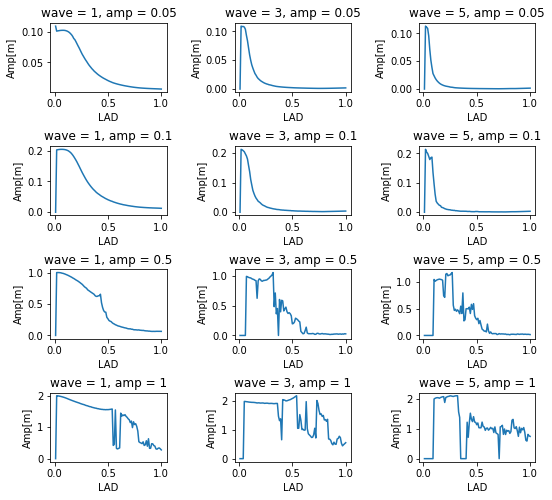

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax11 = fig.add_subplot(4,3,11)
ax12 = fig.add_subplot(4,3,12)



ax1.plot(data_wave_1_amp_005['LAD'], data_wave_1_amp_005['ptop'])
ax2.plot(data_wave_3_amp_005['LAD'], data_wave_3_amp_005['ptop'])
ax3.plot(data_wave_5_amp_005['LAD'], data_wave_5_amp_005['ptop'])
ax4.plot(data_wave_1_amp_010['LAD'], data_wave_1_amp_010['ptop'])
ax5.plot(data_wave_3_amp_010['LAD'], data_wave_3_amp_010['ptop'])
ax6.plot(data_wave_5_amp_010['LAD'], data_wave_5_amp_010['ptop'])
ax7.plot(data_wave_1_amp_050['LAD'], data_wave_1_amp_050['ptop'])
ax8.plot(data_wave_3_amp_050['LAD'], data_wave_3_amp_050['ptop'])
ax9.plot(data_wave_5_amp_050['LAD'], data_wave_5_amp_050['ptop'])
ax10.plot(data_wave_1_amp_100['LAD'], data_wave_1_amp_100['ptop'])
ax11.plot(data_wave_3_amp_100['LAD'], data_wave_3_amp_100['ptop'])
ax12.plot(data_wave_5_amp_100['LAD'], data_wave_5_amp_100['ptop'])

ax1.set_title("wave = 1, amp = 0.05")
ax2.set_title("wave = 3, amp = 0.05")
ax3.set_title("wave = 5, amp = 0.05")
ax4.set_title("wave = 1, amp = 0.1")
ax5.set_title("wave = 3, amp = 0.1")
ax6.set_title("wave = 5, amp = 0.1")
ax7.set_title("wave = 1, amp = 0.5")
ax8.set_title("wave = 3, amp = 0.5")
ax9.set_title("wave = 5, amp = 0.5")
ax10.set_title("wave = 1, amp = 1")
ax11.set_title("wave = 3, amp = 1")
ax12.set_title("wave = 5, amp = 1")

ax1.set_xlabel("LAD")
ax2.set_xlabel("LAD")
ax3.set_xlabel("LAD")
ax4.set_xlabel("LAD")
ax5.set_xlabel("LAD")
ax6.set_xlabel("LAD")
ax7.set_xlabel("LAD")
ax8.set_xlabel("LAD")
ax9.set_xlabel("LAD")
ax10.set_xlabel("LAD")
ax11.set_xlabel("LAD")
ax12.set_xlabel("LAD")

ax1.set_ylabel("Amp[m]")
ax2.set_ylabel("Amp[m]")
ax3.set_ylabel("Amp[m]")
ax4.set_ylabel("Amp[m]")
ax5.set_ylabel("Amp[m]")
ax6.set_ylabel("Amp[m]")
ax7.set_ylabel("Amp[m]")
ax8.set_ylabel("Amp[m]")
ax9.set_ylabel("Amp[m]")
ax10.set_ylabel("Amp[m]")
ax11.set_ylabel("Amp[m]")
ax12.set_ylabel("Amp[m]")


fig.tight_layout(h_pad=-2)
fig.set_size_inches(8, 8)


4.1. 시각화 결과 분석

12 개의 그래프를 확인할 때

경로의 진폭이 굉장히 커지고 진동수가 커질 수록 추이가 급변함을 확인하였다.
안정적인 범위에서 "LAD가 길어질수록 경로의 진동의 영향을 덜받게 됨."이라는 특성이 성립하여 관련 실험이 가능한 경우는 LAD에 대해 항상 우하향이다.
따라서 조건을 만족하는 데이터의 사례는 총 5가지로 아래와 같다.

* wave = 1, amp = 0.05
* wave = 3, amp = 0.05
* wave = 5, amp = 0.05
* wave = 1, amp = 0.1
* wave = 3, amp = 0.1

위 데이터의 최소 LAD와 최대 LAD의 범위를 조사하기 위하여 
사용이 가능한 5가지의 경우를 클랜징한다.

데이터의 첫 행에서 이상치가 보이는 문제를 해결하는 것에 집중한다.

# 5. 결측치 이상치 확인 및 제거

독립변수 LAD를 제외한 다른 변수의 중복을 인정하며, 
LAD 변수의 중복은 시뮬레이터 상에서 중복데이터가 나오지 않기 때문에 
중복제거는 하지않는다.

In [57]:
# data_wave_1_amp_005
# 결측치 확인
data_wave_1_amp_005.isnull().sum()

simulation fail val    0
LAD                    0
y_max                  0
y_min                  0
theta_max              0
theta_min              0
ptop                   0
dtype: int64

In [58]:
# data_wave_3_amp_005
# 결측치 확인
data_wave_3_amp_005.isnull().sum()


simulation fail val    0
LAD                    0
y_max                  0
y_min                  0
theta_max              0
theta_min              0
ptop                   0
dtype: int64

In [59]:
# data_wave_5_amp_005
# 결측치 확인
data_wave_5_amp_005.isnull().sum()

simulation fail val    0
LAD                    0
y_max                  0
y_min                  0
theta_max              0
theta_min              0
ptop                   0
dtype: int64

In [60]:
# data_wave_1_amp_010
# 결측치 확인
data_wave_1_amp_010.isnull().sum()

simulation fail val    0
LAD                    0
y_max                  0
y_min                  0
theta_max              0
theta_min              0
ptop                   0
dtype: int64

In [61]:
# data_wave_3_amp_010
# 결측치 확인
data_wave_3_amp_010.isnull().sum()

simulation fail val    0
LAD                    0
y_max                  0
y_min                  0
theta_max              0
theta_min              0
ptop                   0
dtype: int64

In [62]:
# 그래프에서 나타난 초기값 이상치 확인하기

# 값이 존재하지만 0인 경우로 실질적으로 결측치인 사례를 조사 
case0 = data_wave_1_amp_005["ptop"].isin([0]).sum()
case1 = data_wave_3_amp_005["ptop"].isin([0]).sum()
case2 = data_wave_5_amp_005["ptop"].isin([0]).sum()
case3 = data_wave_1_amp_010["ptop"].isin([0]).sum()
case4 = data_wave_3_amp_010["ptop"].isin([0]).sum()

print("data_wave_1_amp_005 num of zero values = " + str(case0))
print("data_wave_3_amp_005 num of zero values = " + str(case1))
print("data_wave_5_amp_005 num of zero values = " + str(case2))
print("data_wave_1_amp_010 num of zero values = " + str(case3))
print("data_wave_3_amp_010 num of zero values = " + str(case4))


# simulation fail val == 1 인 경우
# 곧 시뮬레이션이 실패하여 0을 무저건 적으로 반환한 경우 이다.  
# 시뮬레이션이 실패한 경우의 개수 확인하기
case0 = data_wave_1_amp_005["simulation fail val"].isin([1]).sum()
case1 = data_wave_3_amp_005["simulation fail val"].isin([1]).sum()
case2 = data_wave_5_amp_005["simulation fail val"].isin([1]).sum()
case3 = data_wave_1_amp_010["simulation fail val"].isin([1]).sum()
case4 = data_wave_3_amp_010["simulation fail val"].isin([1]).sum()

print("data_wave_1_amp_005 num of simulation fail values = " + str(case0))
print("data_wave_3_amp_005 num of simulation fail values = " + str(case1))
print("data_wave_5_amp_005 num of simulation fail values = " + str(case2))
print("data_wave_1_amp_010 num of simulation fail values = " + str(case3))
print("data_wave_3_amp_010 num of simulation fail values = " + str(case4))


data_wave_1_amp_005 num of zero values = 0
data_wave_3_amp_005 num of zero values = 1
data_wave_5_amp_005 num of zero values = 1
data_wave_1_amp_010 num of zero values = 1
data_wave_3_amp_010 num of zero values = 1
data_wave_1_amp_005 num of simulation fail values = 0
data_wave_3_amp_005 num of simulation fail values = 1
data_wave_5_amp_005 num of simulation fail values = 1
data_wave_1_amp_010 num of simulation fail values = 1
data_wave_3_amp_010 num of simulation fail values = 1


> 이상치의 개수가 하나 뿐이고, 첫 행에서만 이상치가 발생하였다.


>데이터의 개수가 100개로 충분히 많을 뿐더러, 1~100 행 사이에 존재하는 변수들이 "연속"인 것을 해치지 않는다면 
>초기 1행의 데이터를 탈락시키는 것은 분석에 영향을 주지않는다.

>따라서 첫 행의 데이터를 탈락시켜 이상치를 처리한다.  

In [63]:
# 그래프에서 드러난 첫항의 이상치를 제거
data_wave_1_amp_005 = data_wave_1_amp_005.drop(index=0, axis=0)
data_wave_3_amp_005 = data_wave_3_amp_005.drop(index=0, axis=0)
data_wave_5_amp_005 = data_wave_5_amp_005.drop(index=0, axis=0)
data_wave_1_amp_010 = data_wave_1_amp_010.drop(index=0, axis=0)
data_wave_3_amp_010 = data_wave_3_amp_010.drop(index=0, axis=0)

In [64]:
# 이상치 제거 검정 과정

case0 = data_wave_1_amp_005["ptop"].isin([0]).sum()
case1 = data_wave_3_amp_005["ptop"].isin([0]).sum()
case2 = data_wave_5_amp_005["ptop"].isin([0]).sum()
case3 = data_wave_1_amp_010["ptop"].isin([0]).sum()
case4 = data_wave_3_amp_010["ptop"].isin([0]).sum()

print("data_wave_1_amp_005 num of zero values = " + str(case0))
print("data_wave_3_amp_005 num of zero values = " + str(case1))
print("data_wave_5_amp_005 num of zero values = " + str(case2))
print("data_wave_1_amp_010 num of zero values = " + str(case3))
print("data_wave_3_amp_010 num of zero values = " + str(case4))

case0 = data_wave_1_amp_005["simulation fail val"].isin([1]).sum()
case1 = data_wave_3_amp_005["simulation fail val"].isin([1]).sum()
case2 = data_wave_5_amp_005["simulation fail val"].isin([1]).sum()
case3 = data_wave_1_amp_010["simulation fail val"].isin([1]).sum()
case4 = data_wave_3_amp_010["simulation fail val"].isin([1]).sum()

print("data_wave_1_amp_005 num of simulation fail values = " + str(case0))
print("data_wave_3_amp_005 num of simulation fail values = " + str(case1))
print("data_wave_5_amp_005 num of simulation fail values = " + str(case2))
print("data_wave_1_amp_010 num of simulation fail values = " + str(case3))
print("data_wave_3_amp_010 num of simulation fail values = " + str(case4))

data_wave_1_amp_005 num of zero values = 0
data_wave_3_amp_005 num of zero values = 0
data_wave_5_amp_005 num of zero values = 0
data_wave_1_amp_010 num of zero values = 0
data_wave_3_amp_010 num of zero values = 0
data_wave_1_amp_005 num of simulation fail values = 0
data_wave_3_amp_005 num of simulation fail values = 0
data_wave_5_amp_005 num of simulation fail values = 0
data_wave_1_amp_010 num of simulation fail values = 0
data_wave_3_amp_010 num of simulation fail values = 0


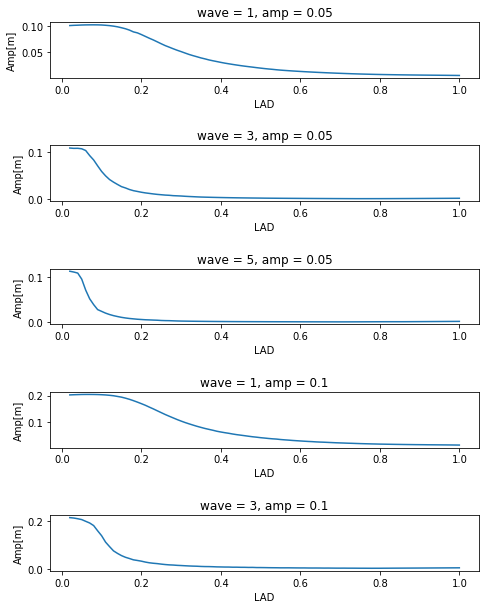

In [65]:
# 이상치 처리 후 시각화로 검정
fig2 = plt.figure()

ax_1_1 = fig2.add_subplot(5, 1, 1)
ax_1_2 = fig2.add_subplot(5, 1, 2)
ax_1_3 = fig2.add_subplot(5, 1, 3)
ax_1_4 = fig2.add_subplot(5, 1, 4)
ax_1_5 = fig2.add_subplot(5, 1, 5)

ax_1_1.plot(data_wave_1_amp_005['LAD'], data_wave_1_amp_005['ptop'])
ax_1_2.plot(data_wave_3_amp_005['LAD'], data_wave_3_amp_005['ptop'])
ax_1_3.plot(data_wave_5_amp_005['LAD'], data_wave_5_amp_005['ptop'])
ax_1_4.plot(data_wave_1_amp_010['LAD'], data_wave_1_amp_010['ptop'])
ax_1_5.plot(data_wave_3_amp_010['LAD'], data_wave_3_amp_010['ptop'])

ax_1_1.set_title("wave = 1, amp = 0.05")
ax_1_2.set_title("wave = 3, amp = 0.05")
ax_1_3.set_title("wave = 5, amp = 0.05")
ax_1_4.set_title("wave = 1, amp = 0.1")
ax_1_5.set_title("wave = 3, amp = 0.1")


ax_1_1.set_xlabel("LAD")
ax_1_2.set_xlabel("LAD")
ax_1_3.set_xlabel("LAD")
ax_1_4.set_xlabel("LAD")
ax_1_5.set_xlabel("LAD")

ax_1_1.set_ylabel("Amp[m]")
ax_1_2.set_ylabel("Amp[m]")
ax_1_3.set_ylabel("Amp[m]")
ax_1_4.set_ylabel("Amp[m]")
ax_1_5.set_ylabel("Amp[m]")


fig2.tight_layout(h_pad=-2)
fig2.set_size_inches(7, 10)


그래프 상에서도 이상치가 제거된 모습이 확인 되었다.

# 6. 데이터 내에서 필요 정보 추출
적절한 최소 LAD와 최대 LAD의 값을 선정하기 위해,
각 데이터 에서 경로의 진폭의 90% 와 10% 영역만큼을 잘라내어 사용한다.
추출한 영역의 최대와 최소를 통해 90% 와 10%의 경계를 인덱스로 찾는다.


In [66]:
# 경계 확인하기 
# cut 명령어를 사용하여 영역을 구분하기
# 단순 진폭이 0.05 이면 PeaktoPeak 진폭은 0.1

bins_005 = pd.IntervalIndex.from_tuples([(float("-inf"), 0.01), (0.01, 0.09), (0.09, float("inf"))])
data_wave_1_amp_005_cutline = pd.cut(data_wave_1_amp_005.ptop, bins_005)
data_wave_3_amp_005_cutline = pd.cut(data_wave_3_amp_005.ptop, bins_005)
data_wave_5_amp_005_cutline = pd.cut(data_wave_5_amp_005.ptop, bins_005)

# 단순 진폭이 0.1 이면 PeaktoPeak 진폭은 0.2
bins_010  = pd.IntervalIndex.from_tuples([(float("-inf"), 0.02), (0.02, 0.18), (0.18, float("inf"))])
data_wave_1_amp_010_cutline = pd.cut(data_wave_1_amp_010.ptop, bins_010)
data_wave_3_amp_010_cutline = pd.cut(data_wave_3_amp_010.ptop, bins_010)


cut 명령어를 통해 영역을 구분한 뒤에 
groupby 명령어로 범주화한다.

In [67]:
data_wave_1_amp_005_groupby = data_wave_1_amp_005.LAD.groupby(data_wave_1_amp_005_cutline)
data_wave_3_amp_005_groupby = data_wave_3_amp_005.LAD.groupby(data_wave_3_amp_005_cutline)
data_wave_5_amp_005_groupby = data_wave_5_amp_005.LAD.groupby(data_wave_5_amp_005_cutline)
data_wave_1_amp_010_groupby = data_wave_1_amp_010.LAD.groupby(data_wave_1_amp_010_cutline)
data_wave_3_amp_010_groupby = data_wave_3_amp_010.LAD.groupby(data_wave_3_amp_010_cutline)

In [68]:
# 각 데이터의 구간별 LAD 최대 최소 정보 추출
data_wave_1_amp_005_groupby.aggregate(["max", "min"])

,max,min
ptop,,
"(-inf, 0.01]",1.00,0.72
"(0.01, 0.09]",0.71,0.18
"(0.09, inf]",0.17,0.02


In [69]:
data_wave_3_amp_005_groupby.aggregate(["max", "min"])

,max,min
ptop,,
"(-inf, 0.01]",1.00,0.25
"(0.01, 0.09]",0.24,0.08
"(0.09, inf]",0.07,0.02


In [70]:
data_wave_5_amp_005_groupby.aggregate(["max", "min"])

,max,min
ptop,,
"(-inf, 0.01]",1.00,0.16
"(0.01, 0.09]",0.15,0.06
"(0.09, inf]",0.05,0.02


In [71]:
data_wave_1_amp_010_groupby.aggregate(["max", "min"])

,max,min
ptop,,
"(-inf, 0.02]",1.00,0.72
"(0.02, 0.18]",0.71,0.19
"(0.18, inf]",0.18,0.02


In [72]:
data_wave_3_amp_010_groupby.aggregate(["max", "min"])

,max,min
ptop,,
"(-inf, 0.02]",1.00,0.25
"(0.02, 0.18]",0.24,0.08
"(0.18, inf]",0.07,0.02


# 7. 정리 

각 경로 경우에 대하여 구해진 최대 및 최소 LAD 범위는 각 아래와 같다.

* wave = 1, amp = 0.05
    + 구간 : 0.71~0.18
    + 길이 : 0.53
* wave = 3, amp = 0.05
    + 구간 : 0.24~0.08
    + 길이 : 0.16
* wave = 5, amp = 0.05
    + 구간 : 0.15~0.06
    + 길이 : 0.09
* wave = 1, amp = 0.1
    + 구간 : 0.71~0.19
    + 길이 : 0.52
* wave = 3, amp = 0.1
    + 구간 : 0.24~0.08
    + 길이 : 0.16

LAD의 검정을 위해서는 최대와 최소의 변화의 폭이 크게 드러나는 경우가 유리하고, 진폭이 너무 작지 않은 것이 시뮬레이션에 용이하므로 
구간의 길이는 2번 째로 길지만, 진폭이 0.1로 0.05 보다 큰 wave = 1, amp = 0.1를 선택한다.

>* wave = 1, amp = 0.1
>    + 구간 : 0.71~0.19
>    + 길이 : 0.52

따라서, 위 경우를 실험 경로로 선정한다.

이상으로 새로운 방식의 pure-pursuit을 태스트하기 위한 경로를 선정하였으며
선정된 경로의 최대 및 최소 LAD를 구하였다.

# 차별화 포인트
* 데이터를 직접 생성하여 사용하였습니다.
    >데이터를 생성하는 과정에서 시뮬레이터의 에러에 봉착하여 오히려 시간을 많이 소모하고 데이터를 추출할 수 없었던 문제도 존재하였지만, 최종적으로는 데이터를 성공적으로 수집할 수 있었습니다.
    
* 데이터의 cut에 대한 새로운 교재 이외의 방법을 시도하였습니다.
    >cut 할 구간을 [(float("-inf"), 0.01), (0.01, 0.09), (0.09, float("inf"))] 과 같이 균등 간격도 아니고 균등 개수도 아닌 영역으로 지정할 필요가 있었던 것을 
    >cut의 bins 파라미터를 이용하여 영역을 지정하였습니다.  


# 데이터분석 수업을 마감하며

이번 학기는 수업과 기계공학과 졸업프로젝트가 동시에 진행이되며 정신이 없었지만, 

빅데이터 과목은 연구활동에 반드시 필요한 내용을 습득할 수 있어 좋은 수업이었습니다. 
실제로도 연구실에서 진행하던 내용중 시스템에 적용할 최소나 최대 LAD를 임의의 값으로 사용하고 있었던 것을 
이번 기회를 통해 적당히 들어 맞는 임의값(magic number)이 아닌 합리적으로 추출된 값을 사용할 수 있는 수준까지 발전 시키게되었습니다.

데이터를 다룬 기술에 대하여 배울 수 있어 좋았습니다.

그리고 공대계열이라 귀무가설과 대립가설의 개념등 통계에 대한 개념을 잘 알지 못하였지만, 이번 수업을 통해 알게되어 도움이 되었으며, 특히나 귀무가설이나 대립가설의 개념은 다른 분야에서 직접 만나게 되었고 이해할 수 있어서 매우 뿌듯하였습니다.

잘 알려주셔서 감사합니다. 

두손에 꽉 쥐고 싶었지만, 손 안에 너무 많은 것들이 있었던 탓에, 본질이 손틈새로 빠져나가는 절망을 가장 잘 느낄 수 있었던 과목입니다. 
서글프면서도 마음에 큰 다짐을 새겨준 과목이 되었습니다. 
이상입니다.